In [1]:
from FPL_data_analyze.read_data import *
from FPL_data_analyze.prepare_data import *
from FPL_data_analyze.merge_data import *
from FPL_data_analyze.prepare_to_plot import *
from FPL_data_analyze.create_plots import *
pd.options.mode.chained_assignment = None

Przeczytajmy plik oraz wybierzmy ostatni normalny sezon do analizy.

In [2]:
players_dic ,gw_dic, oddsy_dic, teams_id_dic = read_all_files(pathfile="C:\\Users\\User\\PycharmProjects\\projekt_zaliczeniowy\\Fantasy-Premier-League-master\\data")
players, players_every_game, oddsy, teams_id = choose_year('2019-20',players_dic,gw_dic,oddsy_dic,teams_id_dic)

Zobaczmy jak wygląda data frame: players.

In [3]:
players

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,2,2,242,0,0,4,69140,0,0,-4,...,58,43,25007,0,47630,0,0.3,8.4,Mustafi,2
1,0,4,204,100,100,4,98745,0,0,-3,...,81,44,206616,0,159819,0,0.3,8.5,Bellerín,2
2,2,1,331,100,100,4,111457,0,0,-3,...,98,55,65194,0,134275,0,0.5,10.6,Kolasinac,4
3,2,3,244,100,100,3,154043,0,0,-5,...,119,41,610816,0,653555,0,0.1,9.1,Maitland-Niles,4
4,0,5,305,100,100,4,39476,0,0,-2,...,76,57,182201,0,231413,0,0.0,11.9,Sokratis,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0,0,0,None,None,0,179456,0,0,0,...,189,0,12504,0,7078,0,0.0,0.0,Buur,0
662,0,0,0,0,0,0,232351,0,0,-1,...,181,0,21912,0,11421,0,0.0,0.0,Giles,0
663,0,0,4,None,None,0,428610,0,0,0,...,246,1,1913,0,1146,0,0.0,0.2,Jordao,0
664,1,2,74,None,None,3,200600,0,0,-6,...,124,25,8281,0,3461,0,0.6,5.1,Podence,0


Teraz oczyścimy dane, aby móc patrzeć tylko na potrzebne informacje oraz móc łączyć ze sobą tabele.

In [4]:
players_every_game_p = players_every_game_prepare(players_every_game)
players_every_game_p

,name,opponent_team,kickoff_time,was_home,total_points,date,name_clear
1584,Aaron_Connolly_534,11,2019-08-31T14:00:00Z,False,1,31/08/2019,Aaron Connolly
7644,Aaron_Connolly_534,1,2019-12-05T20:15:00Z,False,2,05/12/2019,Aaron Connolly
16556,Aaron_Connolly_534,1,2020-06-20T14:00:00Z,True,4,20/06/2020,Aaron Connolly
3196,Aaron_Connolly_534,6,2019-09-28T14:00:00Z,False,1,28/09/2019,Aaron Connolly
15659,Aaron_Connolly_534,7,2020-02-29T12:30:00Z,True,0,29/02/2020,Aaron Connolly
...,...,...,...,...,...,...,...
9630,Ãrjan_Nyland_27,16,2019-12-21T15:00:00Z,True,0,21/12/2019,Ãrjan Nyland
8973,Ãrjan_Nyland_27,15,2019-12-14T15:00:00Z,False,0,14/12/2019,Ãrjan Nyland
525,Ãrjan_Nyland_27,17,2019-08-10T16:30:00Z,False,0,10/08/2019,Ãrjan Nyland
19260,Ãrjan_Nyland_27,10,2020-07-05T15:30:00Z,False,0,05/07/2020,Ãrjan Nyland


In [5]:
teams_id_p = teams_id_prepare(teams_id)
teams_id_p

,id,name
0,1,Arsenal
1,2,Aston Villa
2,3,Bournemouth
3,4,Brighton
4,5,Burnley
5,6,Chelsea
6,7,Crystal Palace
7,8,Everton
8,9,Leicester
9,10,Liverpool


In [6]:
oddsy_p = odssy_prepare(oddsy)
oddsy_p

,Date,HomeTeam,AwayTeam,AvgH,AvgD,AvgA
0,09/08/2019,Liverpool,Norwich,1.14,8.75,19.83
1,10/08/2019,West Ham,Man City,11.84,6.28,1.25
2,10/08/2019,Bournemouth,Sheffield United,2.01,3.53,3.83
3,10/08/2019,Burnley,Southampton,2.68,3.22,2.78
4,10/08/2019,Crystal Palace,Everton,3.13,3.27,2.40
...,...,...,...,...,...,...
375,26/07/2020,Leicester,Man United,3.17,3.49,2.24
376,26/07/2020,Man City,Norwich,1.07,12.80,30.42
377,26/07/2020,Newcastle,Liverpool,7.60,4.99,1.40
378,26/07/2020,Southampton,Sheffield United,2.18,3.47,3.34


In [7]:
players_p = players_prepare(players)
players_p

,team,element_type,first_name,second_name,now_cost,full_name
0,1,2,Shkodran,Mustafi,51,Shkodran Mustafi
1,1,2,Héctor,Bellerín,52,Héctor Bellerín
2,1,2,Sead,Kolasinac,52,Sead Kolasinac
3,1,2,Ainsley,Maitland-Niles,45,Ainsley Maitland-Niles
4,1,2,Sokratis,Papastathopoulos,48,Sokratis Papastathopoulos
...,...,...,...,...,...,...
661,20,2,Oskar,Buur,40,Oskar Buur
662,20,2,Ryan,Giles,39,Ryan Giles
663,20,3,Bruno André,Cavaco Jordao,45,Bruno André Cavaco Jordao
664,20,3,Daniel,Castelo Podence,49,Daniel Castelo Podence


Dane możemy wykorzystać do pomocy wybóru piłkarzy w kolejnej kolejce, teraz połączymy wszystkie dane, aby móc zobaczyć korelację między zmiennymi 

In [8]:
wszystko = merge_players_every_game(players_every_game_p, players_p, teams_id_p, oddsy_p)
wszystko

,AwayTeam,Date,HomeTeam,date,element_type,first_name,full_name,id_AwayTeam,id_HomeTeam,kickoff_time,...,now_cost,odds_draw,odds_lose,odds_win,opponent_team,second_name,team,total_points,was_home,prob_win
0,Arsenal,20/06/2020,Brighton,20/06/2020,4.0,Aaron,Aaron Connolly,1.0,4.0,2020-06-20T14:00:00Z,...,42.0,3.37,2.39,3.04,1,Connolly,4.0,4,True,-0.33
1,Crystal Palace,29/02/2020,Brighton,29/02/2020,4.0,Aaron,Aaron Connolly,7.0,4.0,2020-02-29T12:30:00Z,...,42.0,3.24,3.93,2.08,7,Connolly,4.0,0,True,-1.16
2,Leicester,23/11/2019,Brighton,23/11/2019,4.0,Aaron,Aaron Connolly,9.0,4.0,2019-11-23T15:00:00Z,...,42.0,3.53,2.04,3.69,9,Connolly,4.0,0,True,0.16
3,Man City,11/07/2020,Brighton,11/07/2020,4.0,Aaron,Aaron Connolly,11.0,4.0,2020-07-11T19:00:00Z,...,42.0,5.62,1.31,9.95,11,Connolly,4.0,1,True,4.33
4,Newcastle,20/07/2020,Brighton,20/07/2020,4.0,Aaron,Aaron Connolly,13.0,4.0,2020-07-20T17:00:00Z,...,42.0,3.42,4.23,1.93,13,Connolly,4.0,0,True,-1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11247,Arsenal,04/07/2020,Wolves,04/07/2020,2.0,Zech,Zech Medley,1.0,20.0,2020-07-04T16:30:00Z,...,40.0,3.30,2.27,3.32,20,Medley,1.0,0,False,0.02
11248,Arsenal,25/06/2020,Southampton,25/06/2020,2.0,Zech,Zech Medley,1.0,16.0,2020-06-25T17:00:00Z,...,40.0,3.47,2.64,2.65,16,Medley,1.0,0,False,-0.82
11249,Arsenal,20/06/2020,Brighton,20/06/2020,2.0,Zech,Zech Medley,1.0,4.0,2020-06-20T14:00:00Z,...,40.0,3.37,3.04,2.39,4,Medley,1.0,0,False,-0.98
11250,Arsenal,17/06/2020,Man City,17/06/2020,2.0,Zech,Zech Medley,1.0,11.0,2020-06-17T19:15:00Z,...,40.0,5.50,1.35,8.11,11,Medley,1.0,0,False,2.61


Teraz stworzymy macierz korelacji i zwizualizujemy ją na wykresie  

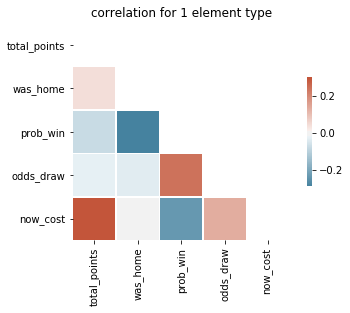

In [9]:
corr_plot(wszystko,1)

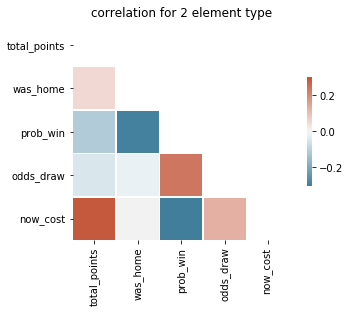

In [10]:
corr_plot(wszystko,2)


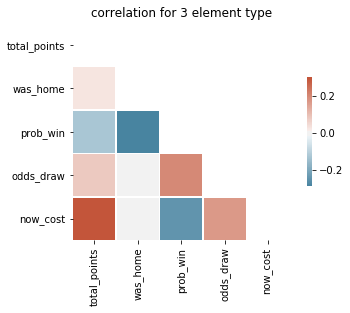

In [11]:
corr_plot(wszystko,3)

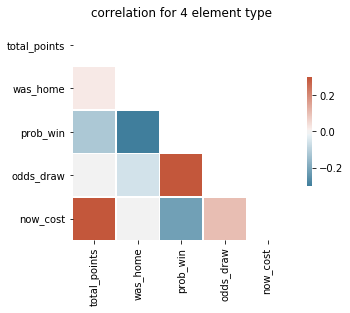

In [12]:
corr_plot(wszystko,4)

Widać, że korelacja nie ma aż tak dużego wpływu, warto by było sprawdzić prawodopobieństwo strzelenia gola przez drużynę czy prawdopodbieństwo zachowanai czysteko konta przez bramkarza. Niestety nie dysponujemy takimi danymi.

Sprawdźmy teraz, które teamy najbardziej opłacało się wybierać, (budżet jest ograniczony) tak aby zoptymaizować swój wynik.

In [13]:
roi_teams_data = roi_teams(players,teams_id_p)
roi_teams_data

,total_points,now_cost,name,roi
0,1580,1915,Arsenal,0.825065
1,1357,1539,Aston Villa,0.881741
2,1265,1560,Bournemouth,0.810897
3,1389,1557,Brighton,0.892100
4,1544,1586,Burnley,0.973518
5,1687,1674,Chelsea,1.007766
6,1333,1521,Crystal Palace,0.876397
7,1444,1700,Everton,0.849412
8,1816,1571,Leicester,1.155952
9,2101,1798,Liverpool,1.168521


Zwizualizujmy te dane na wykresie ,żeby lepiej można było je oceni. Dodamy również średnią dla całej ligi.

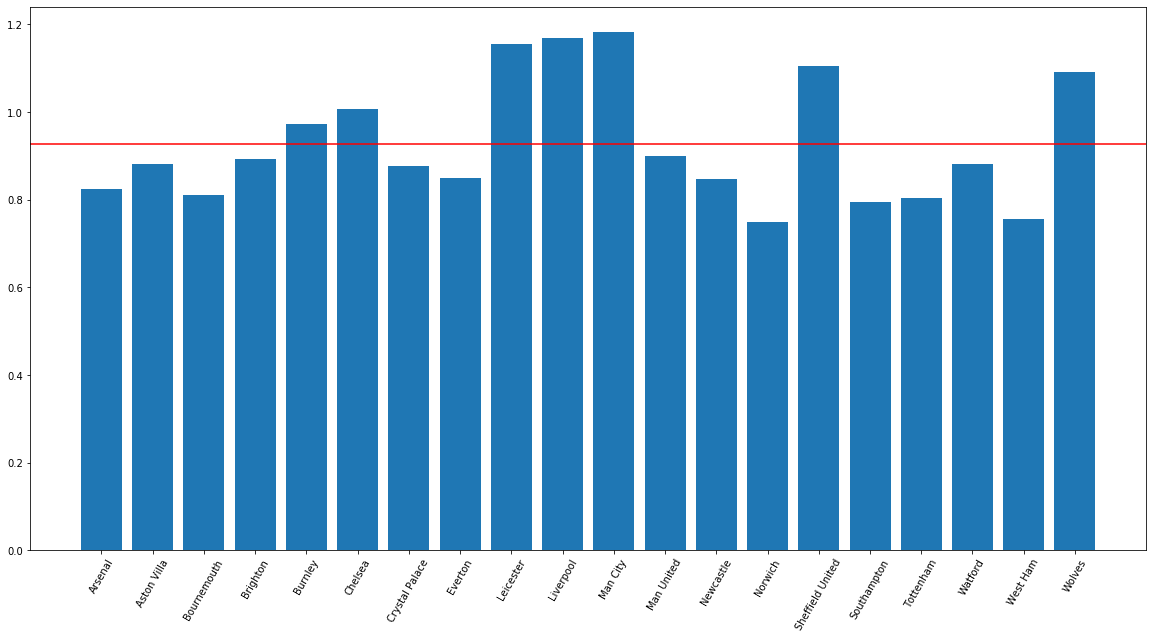

In [14]:
roi_plot(roi_teams_data)

Wśród drużyn mamy dwie najlepsze i najdroższe drużyny, oraz Sheefield Utd które jest rewelacją sezonu i jest jedną z tańszych drużyn.

Teraz skorzystajmy z narzędzia pozwalającego ocenić ROI (stosunek liczby punktów do ceny), dla każdej pozycji. Dzięki temu dość łatwo będzie można wybrać najlepszy team.

In [15]:
goalkeepers_to_polot ,defenders_to_polot, midfielders_to_polot, strikers_to_polot = players_to_plot_prepare(players, teams_id)
goalkeepers_to_polot

,index,web_name,total_points,now_cost,element_type,selected_by_percent,code,draw,form,id,...,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,13,Leno,114,48,1,4.2,3,0,NaN,1,...,4,1170,1170,1200,1150,1240,1180,NaN,False,0
1,21,Martínez,33,44,1,3.8,3,0,NaN,1,...,4,1170,1170,1200,1150,1240,1180,NaN,False,0
2,35,Macey,0,40,1,0.0,3,0,NaN,1,...,4,1170,1170,1200,1150,1240,1180,NaN,False,0
3,42,Nyland,15,43,1,0.4,7,0,NaN,2,...,2,980,970,1040,1000,1050,1020,NaN,False,0
4,52,Heaton,59,43,1,2.1,7,0,NaN,2,...,2,980,970,1040,1000,1050,1020,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,626,Anang,0,40,1,0.1,21,0,NaN,19,...,2,1030,1000,1150,1030,1030,1040,NaN,False,0
69,630,Randolph,3,39,1,0.2,21,0,NaN,19,...,2,1030,1000,1150,1030,1030,1040,NaN,False,0
70,644,Patrício,153,53,1,9.9,39,0,NaN,20,...,4,1230,1180,1200,1200,1190,1230,NaN,False,0
71,645,Ruddy,0,42,1,0.4,39,0,NaN,20,...,4,1230,1180,1200,1200,1190,1230,NaN,False,0


Popatrzmy jak prezentują się gracze na posczególnych pozycjach.

<Figure size 11520x11520 with 0 Axes>

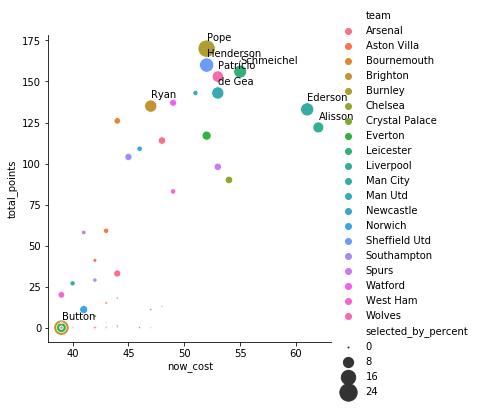

In [16]:
super_plot(goalkeepers_to_polot)

<Figure size 11520x11520 with 0 Axes>

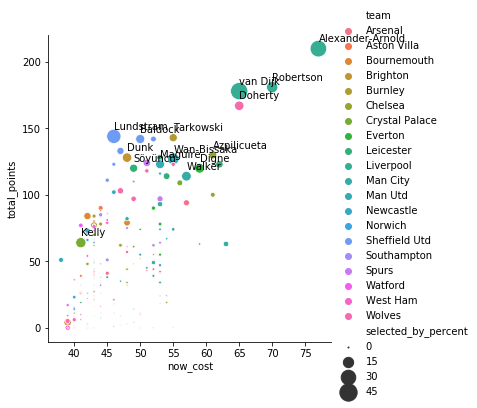

In [17]:
super_plot(defenders_to_polot)

<Figure size 11520x11520 with 0 Axes>

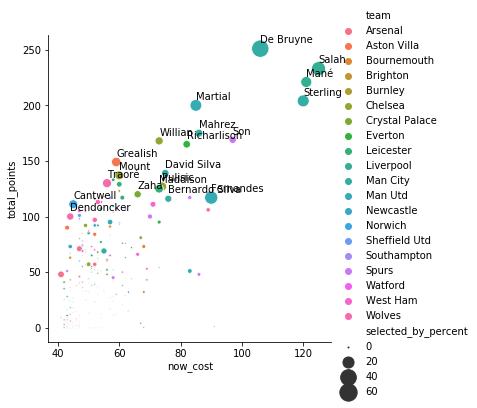

In [18]:
super_plot(midfielders_to_polot)

<Figure size 11520x11520 with 0 Axes>

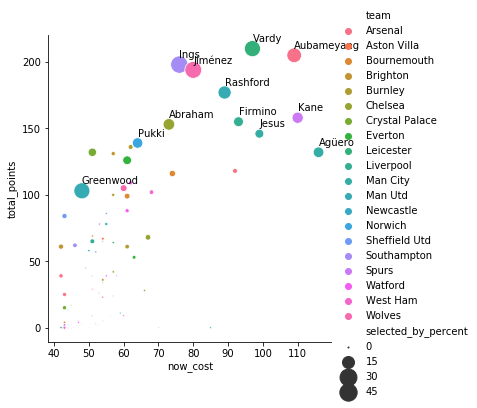

In [19]:
super_plot(strikers_to_polot)